In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('Book1.xlsx')
data = data.dropna()
data.head(5)

,Recording timestamp,Pupil diameter left,Pupil diameter right,Eye movement type
1,0,5.39,5.17,Unclassified
2,10,5.48,5.13,Unclassified
3,20,5.41,5.13,Unclassified
4,30,5.45,5.11,Unclassified
5,40,5.37,5.18,Saccade


Text(0.5,1,'The raw data of pupil diameter')

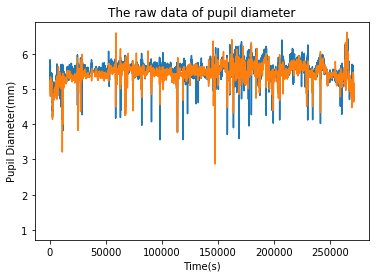

In [2]:
x = data['Recording timestamp']
y1 = data['Pupil diameter left']
y2 = data['Pupil diameter right']
plt.plot(x, y1,1, 'r')
plt.plot(x,y2,1, 'b')
plt.xlabel('Time(s)')
plt.ylabel('Pupil Diameter(mm)')
plt.title('The raw data of pupil diameter')

In [3]:
data['Difference'] = abs(y1-y2)
data['Difference'].head(5)


1    0.22
2    0.35
3    0.28
4    0.34
5    0.19
Name: Difference, dtype: float64

In [4]:
data.iloc[:,4]

1        0.22
2        0.35
3        0.28
4        0.34
5        0.19
6        0.38
7        0.52
8        0.34
9        0.35
11       0.26
13       0.27
16       0.26
19       0.29
22       0.31
25       0.32
28       0.32
30       0.33
34       0.37
37       0.70
67       0.46
70       0.44
73       0.44
76       0.42
79       0.46
82       0.44
85       0.46
87       0.42
90       0.42
93       0.39
96       0.44
         ... 
77166    0.03
77169    0.02
77172    0.02
77175    0.03
77178    0.01
77181    0.03
77184    0.03
77186    0.02
77189    0.03
77192    0.03
77195    0.04
77198    0.04
77201    0.06
77204    0.03
77207    0.05
77210    0.05
77213    0.03
77216    0.06
77219    0.04
77221    0.03
77225    0.06
77228    0.00
77231    0.04
77234    0.00
77237    0.05
77240    0.03
77243    0.08
77246    0.03
77249    0.07
77252    0.11
Name: Difference, Length: 24942, dtype: float64

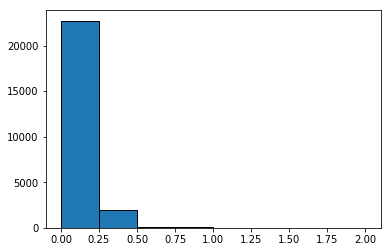

In [5]:
bins = [0, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00]
plt.hist(data.iloc[:,4], bins, edgecolor='black')
plt.show()

Text(0,0.5,'pupil diameter Difference(in mm)')

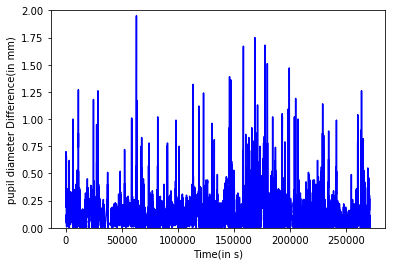

In [6]:
x = data['Recording timestamp']
plt.plot(x, data['Difference'], 'b') 
plt.ylim(0,2)
plt.xlabel('Time(in s)')
plt.ylabel('pupil diameter Difference(in mm)')

In [7]:
dataset = data[data['Difference'] <= 0.25]
dataset = dataset.dropna()
dataset.head(5)     

,Recording timestamp,Pupil diameter left,Pupil diameter right,Eye movement type,Difference
1,0,5.39,5.17,Unclassified,0.22
5,40,5.37,5.18,Saccade,0.19
119,500,5.24,5.18,Saccade,0.06
122,510,5.30,5.13,Saccade,0.17
124,520,5.26,5.20,Fixation,0.06


Text(0,0.5,'pupil diameter Difference(in mm)')

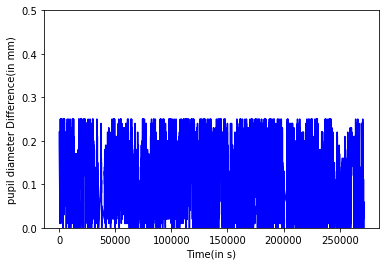

In [8]:
plt.plot(dataset['Recording timestamp'], dataset['Difference'], 'b')
plt.ylim(0,0.5)
plt.xlabel('Time(in s)')
plt.ylabel('pupil diameter Difference(in mm)')

In [14]:
import numpy as np
std = []
for i in range(70000):
    std.append(data.iloc[i:i+8, 1].std())
std

[0.05718079098038836,
 0.05345224838248485,
 0.054363196584243836,
 0.050709255283711,
 0.05125217765408328,
 0.03583194903195432,
 0.03270539492412315,
 0.02251983252919208,
 0.02326094212561975,
 0.018077215335491205,
 0.021671244937540003,
 0.12906255404703118,
 0.12980754985747167,
 0.12534951136721673,
 0.12130245551630726,
 0.11572751247156891,
 0.10868532559642081,
 0.09280355596635301,
 0.08175529690135423,
 0.019999999999999987,
 0.01922609833384965,
 0.01922609833384965,
 0.022951812875799393,
 0.02138089935299391,
 0.01982062417930226,
 0.03693623849670836,
 0.046271713049890764,
 0.07151423434733611,
 0.11925363127145681,
 0.15973191827022454,
 0.16385969608173936,
 0.16864480848390037,
 0.1526901624672843,
 0.14579829511054931,
 0.06430951940198504,
 0.03270539492412303,
 0.0366450152525161,
 0.029489707647632844,
 0.032486260832190875,
 0.029001231500945253,
 0.029760952365713633,
 0.03327375628243455,
 0.031167748898959152,
 0.03603074084326168,
 0.03284161123592186,
 0.

In [15]:
deviation = pd.DataFrame(std)
deviation = deviation.dropna()
deviation['std']=std[0]
deviation.head()

,0,std
0,0.057181,0.057181
1,0.053452,0.057181
2,0.054363,0.057181
3,0.050709,0.057181
4,0.051252,0.057181


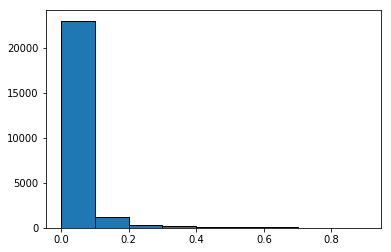

In [12]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
plt.hist(deviation.iloc[:,0], bins, edgecolor='black')
plt.show()

Text(0,0.5,'pupil diameter Slip Standard deviation(in mm)')

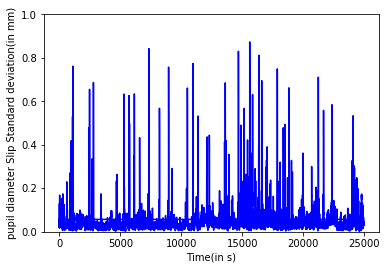

In [16]:
plt.plot(deviation, 'b')
plt.ylim(0,1)
plt.xlabel('Time(in s)')
plt.ylabel('pupil diameter Slip Standard deviation(in mm)')

In [17]:
std1=[]
for i in range(len(std)-1):
    std1.append(abs(std[i+1]-std[i]))
std1=pd.DataFrame(std1)
std1.head()

,0
0,0.003729
1,0.000911
2,0.003654
3,0.000543
4,0.015420


Text(0,0.5,'Slip Standard deviation with consecutive differences(in mm)')

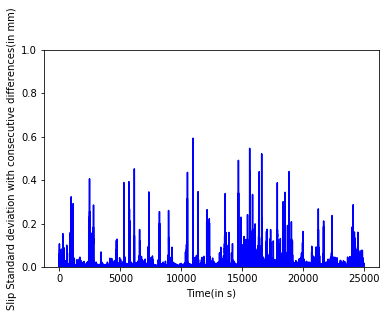

In [23]:
plt.plot(std1, 'b')
plt.ylim(0,1)
plt.xlabel('Time(in s)')
plt.ylabel('Slip Standard deviation with consecutive differences(in mm)')

In [19]:
database = pd.read_excel('Book2.xlsx')
database = database.dropna()
database.head(5)

,Recording timestamp,Pupil diameter left,Pupil diameter right,Pupil Diameter,Eye movement type,Recording timestamp1,Pupil diameter left1,Pupil diameter right1,Pupil Diameter1,Eye movement type1,Recording timestamp2,Pupil diameter left2,Pupil diameter right2,Pupil Diameter2,Eye movement type2
1,80,5.50,5.15,5.325,Fixation,50.0,5.51,5.13,5.320,Saccade,0.0,5.39,5.17,5.280,Unclassified
5,100,5.46,5.19,5.325,Fixation,460.0,5.52,5.18,5.350,Saccade,4138.0,5.03,5.00,5.015,Unclassified
8,110,5.44,5.18,5.310,Fixation,470.0,5.68,5.19,5.435,Saccade,4148.0,5.10,4.96,5.030,Unclassified
11,120,5.45,5.16,5.305,Fixation,480.0,5.45,4.79,5.120,Saccade,4158.0,5.03,4.97,5.000,Unclassified
14,130,5.47,5.16,5.315,Fixation,490.0,5.31,5.02,5.165,Saccade,4168.0,5.09,4.92,5.005,Unclassified


Text(0.5,1,'Fixation type eye movement')

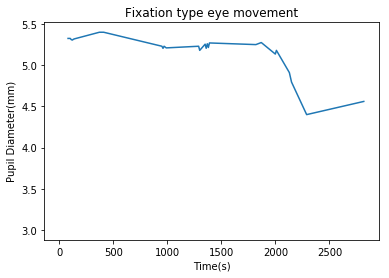

In [20]:
x = database['Recording timestamp']
y1 = database['Pupil Diameter']
plt.plot(x, y1, 3, 'b')
plt.xlabel('Time(s)')
plt.ylabel('Pupil Diameter(mm)')
plt.title('Fixation type eye movement')

Text(0.5,1,'Saccade type eye movement')

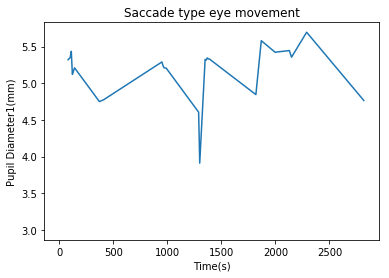

In [21]:
x = database['Recording timestamp']
y1 = database['Pupil Diameter1']
plt.plot(x, y1, 3, 'b')
plt.xlabel('Time(s)')
plt.ylabel('Pupil Diameter1(mm)')
plt.title('Saccade type eye movement')

Text(0.5,1,'Unclassified type eye movement')

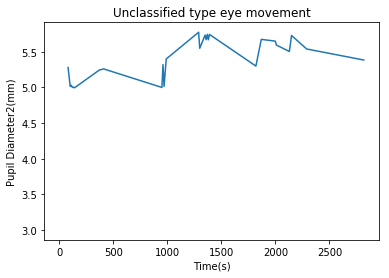

In [19]:
x = database['Recording timestamp']
y1 = database['Pupil Diameter2']
plt.plot(x, y1, 3, 'b')
plt.xlabel('Time(s)')
plt.ylabel('Pupil Diameter2(mm)')
plt.title('Unclassified type eye movement')